In [2]:
import asdf
import numpy as np
import matplotlib.pyplot
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import pandas as pd

sim_dir = "/fs/ddn/sdf/group/kipac/g/cosmo/ki21/phil1/simulations/ZoomIns/SymphonyMilkyWay/Halo023"

from mwgcs import Orbit, SymphonyOrbit
import symlib

Gravitree path added to sys.path.


# can i load orbits properly

In [2]:
af = asdf.open("tracked_clusters.asdf")

In [3]:
orbit = SymphonyOrbit(af, 124, sim_dir)

In [4]:
w = orbit.get_gc_phase_space()

In [ ]:
w.shape

In [44]:
x, y, z = orbit.pos.T

xs = UnivariateSpline(1000 * orbit.snapshot_times[orbit.snaps], x, s=0)
ys = UnivariateSpline(1000 * orbit.snapshot_times[orbit.snaps], y, s=0)

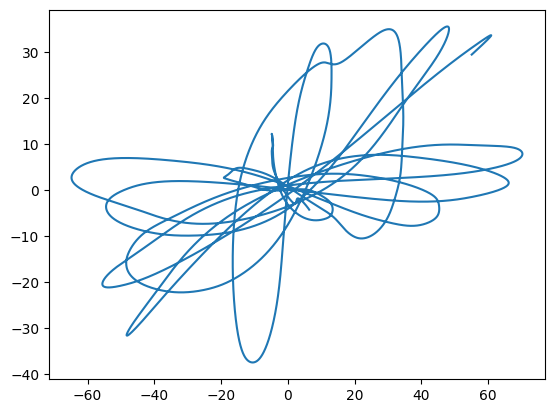

In [5]:
fig, ax = plt.subplots()
# ax.plot(xs(orbit.t), ys(orbit.t), c='r')
ax.plot(w[0, :], w[1, :])
# ax.plot(orbit.t, )
# ax.set_xlim(-40, 40)
# ax.set_ylim(-40, 40)
plt.show()

In [46]:
orbit.snapshot_times[orbit.snaps][-1] - orbit.snapshot_times[orbit.snaps][0]

12.49260534972181

In [23]:
(orbit.t / 1000)

array([0.00000000e+00, 1.00000123e-05, 2.00000246e-05, ...,
       1.24925853e+01, 1.24925953e+01, 1.24926053e+01])

# can i load potentials and interpolate them?

In [4]:
af = asdf.open("tracked_potentials.asdf")

In [6]:
af.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 3.3.0
├─history (dict)
│ └─extensions (list) ...
├─fit_param (list)
│ ├─[0] (dict) ...
│ ├─[1] (dict) ...
│ ├─[2] (dict) ...
│ ├─[3] (dict) ...
│ ├─[4] (dict) ...
│ ├─[5] (dict) ...
│ ├─[6] (dict) ...
│ ├─[7] (dict) ...
│ └─68666 not shown
├─halo_id (list) ...
├─pos (list) ...
├─snapshot (list) ...
├─type (list) ...
└─vel (list): []
Some nodes not shown.


In [10]:
host_index_z0 = np.where((np.array(af['halo_id']) == 0) & (np.array(af['snapshot']) == 235) )[0]

np.array(af['fit_param'])[host_index_z0]

array([{'cvir': 11.534417152404785, 'mvir': 1137285791744.0, 'rvir': 271.9942932128906}],
      dtype=object)

In [16]:
einasto_indices = np.where((np.array(af['type']) == 'einasto') )[0]

In [18]:
np.array(af['halo_id'])[einasto_indices]

array([ 82, 193, 324, 341, 341, 341, 347, 281, 208, 259, 273, 330, 358,
       244, 188, 188, 244, 188, 401, 401, 401, 401, 401, 358, 198, 341,
       341, 367, 367, 367, 381,  92,  92, 367,  92, 310, 310, 367, 310,
       367])